In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
y_train = train['label']
X_train = train.drop(columns=['label'])

In [4]:
example = X_train.iloc[1, :]
example = example.to_numpy()

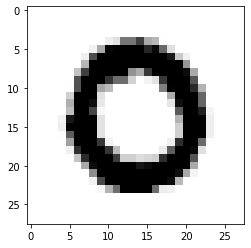

In [5]:
plt.imshow(example.reshape(28,28), cmap = 'binary')

In [6]:
y_train[1]

0

# Softmax Regression to Classify #

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100, C = 10)

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(softmax_reg, X_train_scaled, y_train, cv = 3)

C:\Users\Ridha\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Ridha\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  

In [10]:
scores.mean()

0.8967142857142857

In [11]:
scores.std()

0.002250472361603234

In [12]:
softmax_reg.fit(X_train_scaled, y_train)

C:\Users\Ridha\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
test_scaled = scaler.transform(test)
test_pred = softmax_reg.predict(test_scaled)
final = pd.DataFrame({'label':test_pred}, index = np.arange(1,len(test_pred)+1))
final.to_csv("final2.csv")